# Задача 8 вариант 11

## Описание

Моделирование движения протона в магнитном поле (Сила Лоренца)

Класс ```Vector``` для представления векторных велечин в трехмерном пространстве

In [107]:
class Vector:
    
    def __init__(self, x: float, y: float, z: float):
        self._x = x
        self._y = y
        self._z = z
    
    def __add__(self, other):
        return Vector(self.get_x() + other.get_x(), self.get_y() + other.get_y(), self.get_z() + other.get_z())
    
    def __iadd__(self, other):
        self.__add__(other)
        
    def __sub__(self, other):
        return Vector(self.get_x() - other.get_x(), self.get_y() - other.get_y(), self.get_z() - other.get_z())
        
    def __isub__(self, other):
        self.__sub__(other)
    
    def __mul__(self, other):
        return Vector(self.get_x() * other.get_x(), self.get_y() * other.get_y(), self.get_z() * other.get_z())
    
    def __imul__(self, other):
        return self.__mul__(other)
    
    def multi(self, a: float):
        return Vector(self.get_x() * a, self.get_y() * a, self.get_z() * a)
    
    def div(self, a:float):
        return Vector(self.get_x() / a, self.get_y() / a, self.get_z() / a)
    
    def get_x(self):
        return self._x
    
    def get_y(self):
        return self._y
    
    def get_z(self):
        return self._z
    
    def __str__(self):
        return '{x=' + str(self.get_x()) + ' y=' + str(self.get_y()) + ' z=' + str(self.get_z()) + '}'


Инициализация основных формул и переменных

In [159]:
v0 = Vector(7, 8, -100)
p0 = Vector(0, 0, 0)
b = Vector(100, 100, 10)
q = 1.602621
m = 1.672176
po = 3
t_max = 1
dt = 0.00001

def a_count(_b: Vector, _q: float, _m: float, _po: float, v: Vector):
    return Vector(
        _b.get_z()*v.get_y() - _b.get_y()*v.get_z(),
        _b.get_x()*v.get_z() - _b.get_z()*v.get_x(),
        _b.get_y()*v.get_x() - _b.get_x()*v.get_y()
    ).multi(_q/_m) - v.multi(_po/_m)

def v_count(_v0: Vector, a: Vector, _t: float):
    return _v0 + a.multi(_t)

def pos_count(_p0: Vector, _v0: Vector, a: Vector, _t: float):
    return _p0 + _v0.multi(_t) + a.multi(_t*_t/2)

Расчет массива координат

In [160]:
from numpy.ma import arange

v_cur = v0
f_cur = None
a_cur = None
p_cur = p0

array = [p0]

while t_max > 0:
    t_max -= dt
    a_cur = a_count(b, q, m, po, v_cur)
    v_cur = v_count(v_cur, a_cur, dt)
    p_cur = pos_count(p_cur, v_cur, a_cur, dt)
    array.append(p_cur)

Рисуем

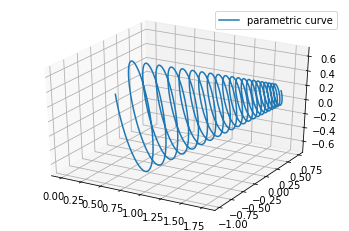

In [161]:
import matplotlib.pyplot as plt


plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = [], [], []
for v in array:
    x.append(v.get_x())
    y.append(v.get_y())
    z.append(v.get_z())

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()